<a href="https://colab.research.google.com/github/fasmina-nasar/DrugReviewSentimentAnalysis/blob/main/drug_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required Libraries**

In [1]:
# utility
import pandas as pd

# for text preprocessing
import nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# for visualization
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**Get ready with dataset**


In [2]:
# load both training and testing dataset with pandas Dataframe
# We pass the '\t' delimeter as argument since this is a tab delimited file
train_data=pd.read_csv('/content/drive/MyDrive/Datasets(deep learning)/drugsComTrain_raw.csv',delimiter='\t')
test_data=pd.read_csv('/content/drive/MyDrive/Datasets(deep learning)/drugsComTest_raw.csv', delimiter='\t')

In [3]:
# check first 5 rows in training dataset

train_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
# check last 5 rows in testing dataset

test_data.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20
53765,113712,Arthrotec,Sciatica,"""It works!!!""",9.0,"September 13, 2009",46


In [5]:
# length of training and testing dataset

len(train_data),len(test_data)

(161297, 53766)

**Merge Train and Test data**

we merge train data and test data to simplify data preprocessing and Visualization.Then we split the dataset in 75:25 ratio for training and testing

In [6]:
# merge train and test data

data=pd.concat([train_data,test_data])
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


In [7]:
# check the shape of merged data

data.shape

(215063, 7)

**Inspect Data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [9]:
data.describe()

,Unnamed: 0,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


**Null Value Treatment**

By utilizing the method isnull() in pandas, we check for the null values and can see the null values in just a single column  i.e condition. 

In [10]:
data.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

Dropping the rows which has null value.here we pass how='any' so that If any null values are present then drop that row or column.

In [11]:
data=data.dropna(how='any')
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


Confirming whether the null values are dropped

In [12]:
data.isnull().any()

Unnamed: 0     False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

**Inferential Statistics**

In [13]:
data.nunique()

Unnamed: 0     213869
drugName         3667
condition         916
review         128449
rating             10
date             3579
usefulCount       397
dtype: int64

**Check Top 15 condition**

In [14]:
data['condition'].value_counts().head(15)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Name: condition, dtype: int64

**Graph of Top 15 Conditions**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


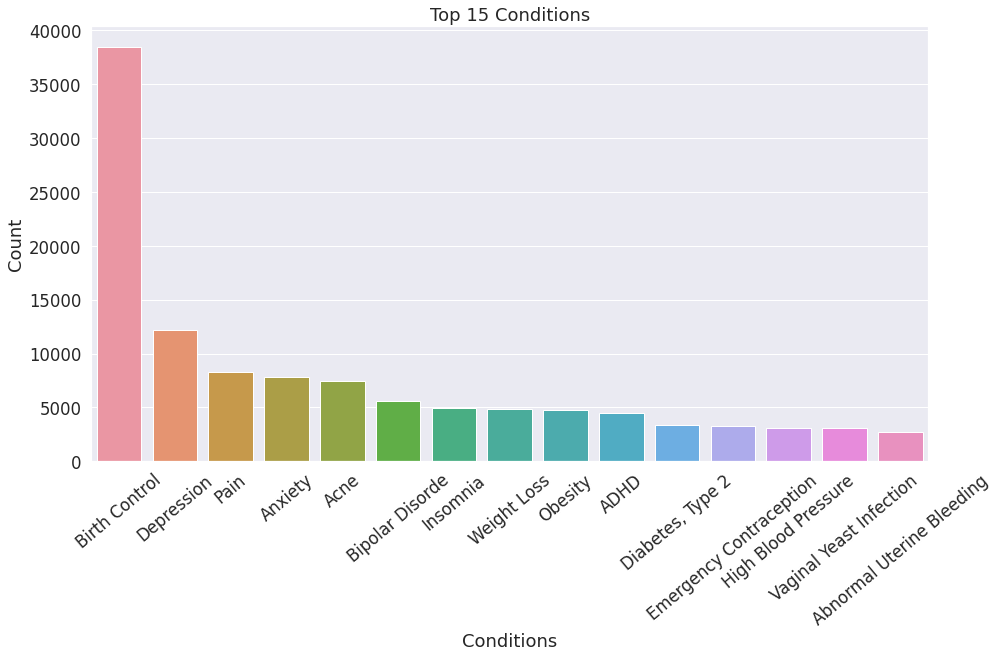

In [15]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=[15,8]

plot_1=dict(data['condition'].value_counts().iloc[:15])
figure=sns.barplot(list(plot_1.keys()),list(plot_1.values()))
figure.set_title('Top 15 Conditions')
figure.set_xlabel('Conditions')
figure.set_ylabel('Count')
figure.set_xticklabels(list(plot_1.keys()),rotation=40)
plt.show()

**Ckecking and visualizing Rarest 15 condition**

In [16]:
data['condition'].value_counts().tail(15)

26</span> users found this comment helpful.     1
63</span> users found this comment helpful.     1
Klinefelter Syndrome                            1
Gestational Diabetes                            1
Cluster-Tic Syndrome                            1
Sporotrichosis                                  1
54</span> users found this comment helpful.     1
Cogan's Syndrome                                1
AV Heart Block                                  1
Paragonimus westermani, Lung Fluke              1
Systemic Candidiasis                            1
Wilson's Disease                                1
unctional Gastric Disorde                       1
Sepsis                                          1
105</span> users found this comment helpful.    1
Name: condition, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


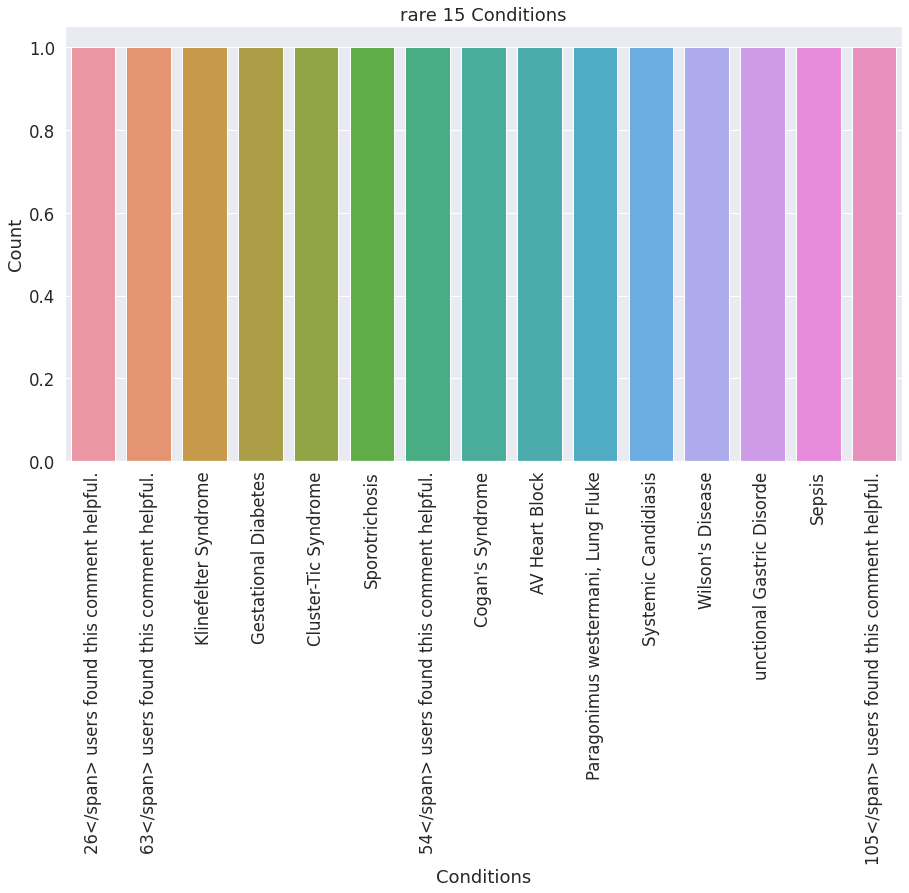

In [17]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=[15,8]

plot_2=dict(data['condition'].value_counts().tail(15))
figure=sns.barplot(list(plot_2.keys()),list(plot_2.values()))
figure.set_title('rare 15 Conditions')
figure.set_xlabel('Conditions')
figure.set_ylabel('Count')
figure.set_xticklabels(list(plot_2.keys()),rotation=90)
plt.show()

**Top 15 Drugs with Maximum rating**

In [18]:
data.loc[data['rating']==10]['drugName'].value_counts().head(15)

Levonorgestrel                       1883
Phentermine                          1079
Etonogestrel                          864
Varenicline                           662
Ethinyl estradiol / norethindrone     601
Escitalopram                          596
Clonazepam                            586
Alprazolam                            565
Sertraline                            550
Plan B                                527
Chantix                               521
Nexplanon                             517
Mirena                                450
Gabapentin                            441
Lexapro                               440
Name: drugName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


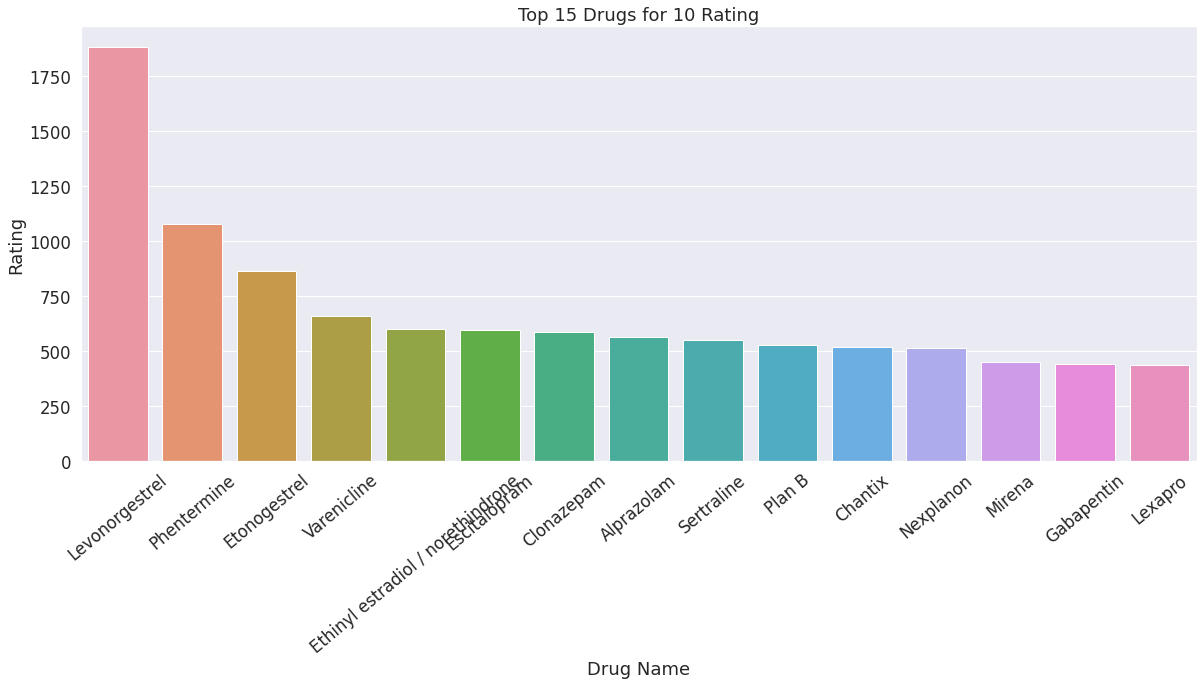

In [19]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=[20,8]

plot_3=dict(data.loc[data['rating']==10]['drugName'].value_counts().head(15))
figure=sns.barplot(list(plot_3.keys()),list(plot_3.values()))
figure.set_title('Top 15 Drugs for 10 Rating')
figure.set_xlabel('Drug Name')
figure.set_ylabel('Rating')
figure.set_xticklabels(list(plot_3.keys()),rotation=40)
plt.show()

**Top 15 Drugs with Minimum rating**

In [20]:
data.loc[data['rating']==10]['drugName'].value_counts().tail(15)

Diphenhydramine / phenylephrine                   1
Cesamet                                           1
Sipuleucel-T                                      1
Gris-PEG                                          1
Citric acid / simethicone / sodium bicarbonate    1
Ranibizumab                                       1
Triple Antibiotic                                 1
Ovace Plus                                        1
Halog-E                                           1
Collagenase clostridium histolyticum              1
Glucophage XR                                     1
Marlissa                                          1
Chloramphenicol                                   1
Epivir                                            1
Guarana                                           1
Name: drugName, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


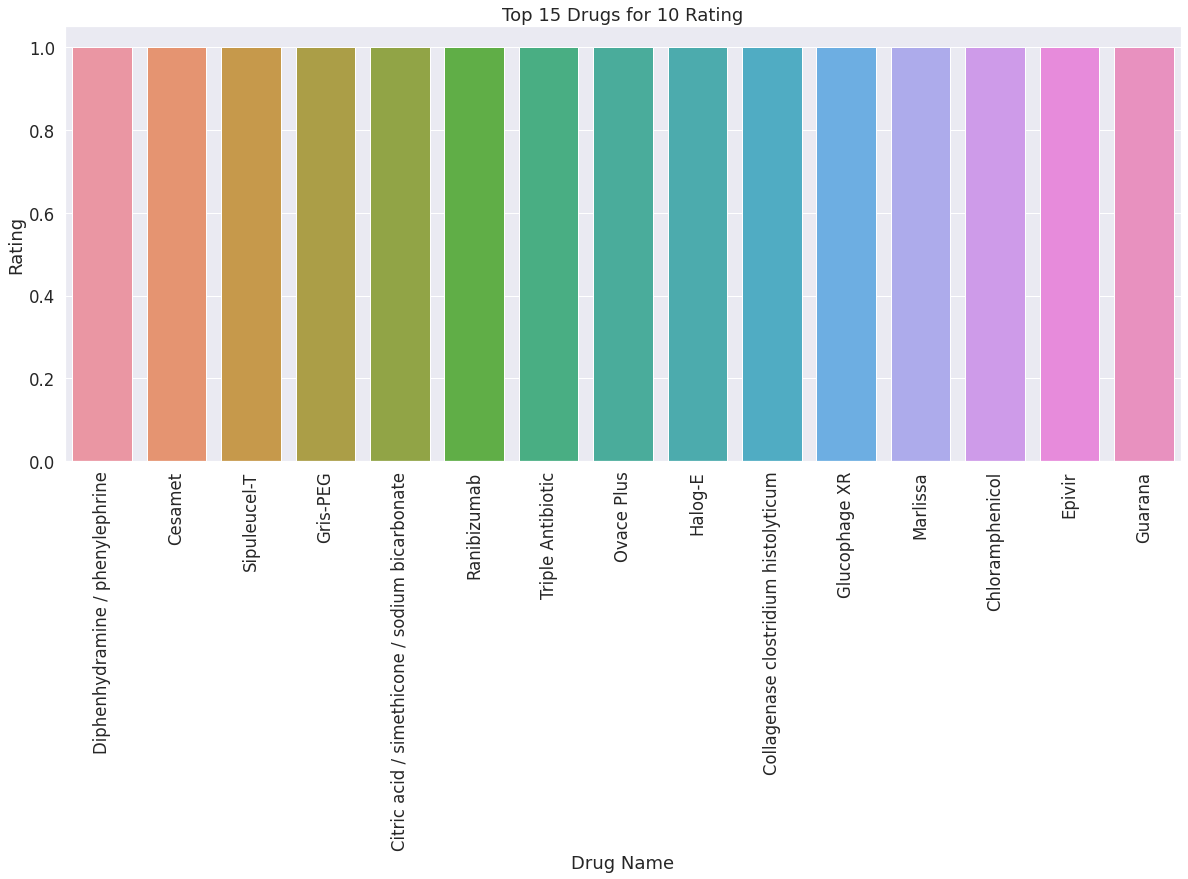

In [21]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=[20,8]

plot_4=dict(data.loc[data['rating']==10]['drugName'].value_counts().tail(15))
figure=sns.barplot(list(plot_4.keys()),list(plot_4.values()))
figure.set_title('Top 15 Drugs for 10 Rating')
figure.set_xlabel('Drug Name')
figure.set_ylabel('Rating')
figure.set_xticklabels(list(plot_4.keys()),rotation=90)
plt.show()

In [22]:
data

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20


Dropping the columns except drugname,condition and review since we're going to predict the review based on drugname and condition

In [23]:
data=data.drop(['Unnamed: 0','date','usefulCount'],axis=1)
data

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0
...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0


**Preprocessing 'review'**

In this section we're going to preprocess the 'review' column.we've to convert the review into either positive,negative or neutral.

**converting text into lower case**

Convert all text into lower case to simplify preprocessing

In [24]:
data['review']=data['review'].astype(str).str.lower()

**Tokenization - Remove punctuation marks using tokenized sentences with NLTK RegexpTokenizer**

Remove every punctuation marks from the text 

In [25]:
tokenizer=nltk.RegexpTokenizer('\w+')
data['review']=data['review'].apply(tokenizer.tokenize)

**Removing Stopwords**

 Removal of Commonly used words that do not add any value to the analysis

In [26]:
stop_words=set(stopwords.words('english'))
data['review']=data['review'].apply(lambda x:[item for item in x if item not in stop_words])

In [27]:
# Removing words which is less than 2 characters
data['text_string']=data['review'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [28]:
data

,drugName,condition,review,rating,text_string
0,Valsartan,Left Ventricular Dysfunction,"[side, effect, take, combination, bystolic, 5,...",9.0,side effect take combination bystolic fish oil
1,Guanfacine,ADHD,"[son, halfway, fourth, week, intuniv, became, ...",8.0,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"[used, take, another, oral, contraceptive, 21,...",5.0,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"[first, time, using, form, birth, control, 039...",8.0,first time using form birth control 039 glad w...
4,Buprenorphine / naloxone,Opiate Dependence,"[suboxone, completely, turned, life, around, f...",9.0,suboxone completely turned life around feel he...
...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","[taken, tamoxifen, 5, years, side, effects, se...",10.0,taken tamoxifen years side effects severe swea...
53762,Escitalopram,Anxiety,"[039, taking, lexapro, escitaploprgram, since,...",9.0,039 taking lexapro escitaploprgram since febru...
53763,Levonorgestrel,Birth Control,"[039, married, 34, years, old, kids, taking, p...",8.0,039 married years old kids taking pill hassle ...
53764,Tapentadol,Pain,"[prescribed, nucynta, severe, neck, shoulder, ...",1.0,prescribed nucynta severe neck shoulder pain t...


**Applying word lemmatizer**

Lemmatization is the grouping together of different forms of the same word.Lemmatization ensures word does'nt lose its meaning.

In [29]:
word_lemmatize=WordNetLemmatizer()
data['text_string']=data['text_string'].apply(word_lemmatize.lemmatize)

In [30]:
data

,drugName,condition,review,rating,text_string
0,Valsartan,Left Ventricular Dysfunction,"[side, effect, take, combination, bystolic, 5,...",9.0,side effect take combination bystolic fish oil
1,Guanfacine,ADHD,"[son, halfway, fourth, week, intuniv, became, ...",8.0,son halfway fourth week intuniv became concern...
2,Lybrel,Birth Control,"[used, take, another, oral, contraceptive, 21,...",5.0,used take another oral contraceptive pill cycl...
3,Ortho Evra,Birth Control,"[first, time, using, form, birth, control, 039...",8.0,first time using form birth control 039 glad w...
4,Buprenorphine / naloxone,Opiate Dependence,"[suboxone, completely, turned, life, around, f...",9.0,suboxone completely turned life around feel he...
...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","[taken, tamoxifen, 5, years, side, effects, se...",10.0,taken tamoxifen years side effects severe swea...
53762,Escitalopram,Anxiety,"[039, taking, lexapro, escitaploprgram, since,...",9.0,039 taking lexapro escitaploprgram since febru...
53763,Levonorgestrel,Birth Control,"[039, married, 34, years, old, kids, taking, p...",8.0,039 married years old kids taking pill hassle ...
53764,Tapentadol,Pain,"[prescribed, nucynta, severe, neck, shoulder, ...",1.0,prescribed nucynta severe neck shoulder pain t...


**Sentiment Analyzer**

The aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score.

In [31]:
analyzer = SentimentIntensityAnalyzer()

In [32]:
data['polarity'] = data['text_string'].apply(lambda x: analyzer.polarity_scores(x))

In [33]:
data

,drugName,condition,review,rating,text_string,polarity
0,Valsartan,Left Ventricular Dysfunction,"[side, effect, take, combination, bystolic, 5,...",9.0,side effect take combination bystolic fish oil,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Guanfacine,ADHD,"[son, halfway, fourth, week, intuniv, became, ...",8.0,son halfway fourth week intuniv became concern...,"{'neg': 0.035, 'neu': 0.756, 'pos': 0.209, 'co..."
2,Lybrel,Birth Control,"[used, take, another, oral, contraceptive, 21,...",5.0,used take another oral contraceptive pill cycl...,"{'neg': 0.064, 'neu': 0.804, 'pos': 0.131, 'co..."
3,Ortho Evra,Birth Control,"[first, time, using, form, birth, control, 039...",8.0,first time using form birth control 039 glad w...,"{'neg': 0.043, 'neu': 0.783, 'pos': 0.174, 'co..."
4,Buprenorphine / naloxone,Opiate Dependence,"[suboxone, completely, turned, life, around, f...",9.0,suboxone completely turned life around feel he...,"{'neg': 0.104, 'neu': 0.608, 'pos': 0.288, 'co..."
...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","[taken, tamoxifen, 5, years, side, effects, se...",10.0,taken tamoxifen years side effects severe swea...,"{'neg': 0.237, 'neu': 0.655, 'pos': 0.108, 'co..."
53762,Escitalopram,Anxiety,"[039, taking, lexapro, escitaploprgram, since,...",9.0,039 taking lexapro escitaploprgram since febru...,"{'neg': 0.122, 'neu': 0.646, 'pos': 0.232, 'co..."
53763,Levonorgestrel,Birth Control,"[039, married, 34, years, old, kids, taking, p...",8.0,039 married years old kids taking pill hassle ...,"{'neg': 0.188, 'neu': 0.77, 'pos': 0.042, 'com..."
53764,Tapentadol,Pain,"[prescribed, nucynta, severe, neck, shoulder, ...",1.0,prescribed nucynta severe neck shoulder pain t...,"{'neg': 0.547, 'neu': 0.453, 'pos': 0.0, 'comp..."


In [34]:
data=pd.concat([data.drop(['text_string'],axis=1),data['polarity'].apply(pd.Series)],axis=1)
data

,drugName,condition,review,rating,polarity,neg,neu,pos,compound
0,Valsartan,Left Ventricular Dysfunction,"[side, effect, take, combination, bystolic, 5,...",9.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Guanfacine,ADHD,"[son, halfway, fourth, week, intuniv, became, ...",8.0,"{'neg': 0.035, 'neu': 0.756, 'pos': 0.209, 'co...",0.035,0.756,0.209,0.9068
2,Lybrel,Birth Control,"[used, take, another, oral, contraceptive, 21,...",5.0,"{'neg': 0.064, 'neu': 0.804, 'pos': 0.131, 'co...",0.064,0.804,0.131,0.7506
3,Ortho Evra,Birth Control,"[first, time, using, form, birth, control, 039...",8.0,"{'neg': 0.043, 'neu': 0.783, 'pos': 0.174, 'co...",0.043,0.783,0.174,0.7184
4,Buprenorphine / naloxone,Opiate Dependence,"[suboxone, completely, turned, life, around, f...",9.0,"{'neg': 0.104, 'neu': 0.608, 'pos': 0.288, 'co...",0.104,0.608,0.288,0.9403
...,...,...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention","[taken, tamoxifen, 5, years, side, effects, se...",10.0,"{'neg': 0.237, 'neu': 0.655, 'pos': 0.108, 'co...",0.237,0.655,0.108,-0.8360
53762,Escitalopram,Anxiety,"[039, taking, lexapro, escitaploprgram, since,...",9.0,"{'neg': 0.122, 'neu': 0.646, 'pos': 0.232, 'co...",0.122,0.646,0.232,0.8658
53763,Levonorgestrel,Birth Control,"[039, married, 34, years, old, kids, taking, p...",8.0,"{'neg': 0.188, 'neu': 0.77, 'pos': 0.042, 'com...",0.188,0.770,0.042,-0.8722
53764,Tapentadol,Pain,"[prescribed, nucynta, severe, neck, shoulder, ...",1.0,"{'neg': 0.547, 'neu': 0.453, 'pos': 0.0, 'comp...",0.547,0.453,0.000,-0.9260


In [36]:
data['review']=data['compound'].apply(lambda x:'positive' if x>0 else 'negative')

In [37]:
data

,drugName,condition,review,rating,polarity,neg,neu,pos,compound
0,Valsartan,Left Ventricular Dysfunction,negative,9.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,Guanfacine,ADHD,positive,8.0,"{'neg': 0.035, 'neu': 0.756, 'pos': 0.209, 'co...",0.035,0.756,0.209,0.9068
2,Lybrel,Birth Control,positive,5.0,"{'neg': 0.064, 'neu': 0.804, 'pos': 0.131, 'co...",0.064,0.804,0.131,0.7506
3,Ortho Evra,Birth Control,positive,8.0,"{'neg': 0.043, 'neu': 0.783, 'pos': 0.174, 'co...",0.043,0.783,0.174,0.7184
4,Buprenorphine / naloxone,Opiate Dependence,positive,9.0,"{'neg': 0.104, 'neu': 0.608, 'pos': 0.288, 'co...",0.104,0.608,0.288,0.9403
...,...,...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",negative,10.0,"{'neg': 0.237, 'neu': 0.655, 'pos': 0.108, 'co...",0.237,0.655,0.108,-0.8360
53762,Escitalopram,Anxiety,positive,9.0,"{'neg': 0.122, 'neu': 0.646, 'pos': 0.232, 'co...",0.122,0.646,0.232,0.8658
53763,Levonorgestrel,Birth Control,negative,8.0,"{'neg': 0.188, 'neu': 0.77, 'pos': 0.042, 'com...",0.188,0.770,0.042,-0.8722
53764,Tapentadol,Pain,negative,1.0,"{'neg': 0.547, 'neu': 0.453, 'pos': 0.0, 'comp...",0.547,0.453,0.000,-0.9260


**Visualizing 'review'**

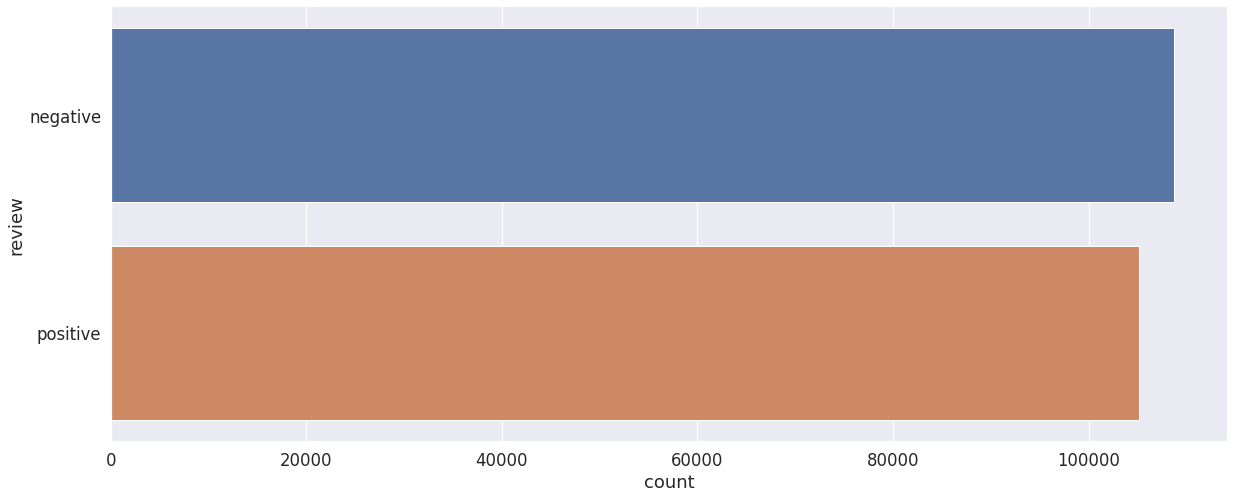

In [38]:
sns.countplot(y='review',data=data)

In [39]:
data_preprocessed=data.drop(['polarity','neg','neu','pos','compound'],axis=1)
data_preprocessed

,drugName,condition,review,rating
0,Valsartan,Left Ventricular Dysfunction,negative,9.0
1,Guanfacine,ADHD,positive,8.0
2,Lybrel,Birth Control,positive,5.0
3,Ortho Evra,Birth Control,positive,8.0
4,Buprenorphine / naloxone,Opiate Dependence,positive,9.0
...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",negative,10.0
53762,Escitalopram,Anxiety,positive,9.0
53763,Levonorgestrel,Birth Control,negative,8.0
53764,Tapentadol,Pain,negative,1.0


**Applying LabelEncoder **

Label encode the object type data 

In [40]:
label_encoder=LabelEncoder()
data_preprocessed['drugName']=label_encoder.fit_transform(data['drugName'])
data_preprocessed['condition']=label_encoder.fit_transform(data['condition'])
data_preprocessed['review']=label_encoder.fit_transform(data['review'])
data_preprocessed

,drugName,condition,review,rating
0,3421,480,0,9.0
1,1536,80,1,8.0
2,1983,175,1,5.0
3,2446,175,1,8.0
4,553,593,1,9.0
...,...,...,...,...
53761,3167,190,0,10.0
53762,1231,133,1,9.0
53763,1874,175,0,8.0
53764,3173,613,0,1.0


**Splitting Dataset into features and target**

In [41]:
X=data_preprocessed.drop('review',axis=1)
y=data_preprocessed['review']

**Apply Scaling for features**

In [42]:
data_preprocessed

,drugName,condition,review,rating
0,3421,480,0,9.0
1,1536,80,1,8.0
2,1983,175,1,5.0
3,2446,175,1,8.0
4,553,593,1,9.0
...,...,...,...,...
53761,3167,190,0,10.0
53762,1231,133,1,9.0
53763,1874,175,0,8.0
53764,3173,613,0,1.0


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler2=StandardScaler().fit(X)
X=scaler2.transform(X)
print(X)

[[ 1.57967483  0.44137703  0.61324272]
 [-0.28987734 -1.20662342  0.30797237]
 [ 0.15345944 -0.81522331 -0.6078387 ]
 ...
 [ 0.04535271 -0.81522331  0.30797237]
 [ 1.33370722  0.98933718 -1.82892012]
 [-1.51971536  1.51669733  0.61324272]]


**Dividing features & target into training and testing part**

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [46]:
y

0        0
1        1
2        1
3        1
4        1
        ..
53761    0
53762    1
53763    0
53764    0
53765    0
Name: review, Length: 213869, dtype: int64

In [47]:
print(X_train.shape,X_test.shape)

(160401, 3) (53468, 3)


**Conducting Hyperparameter tuning**

Conducting Hyperparameter tuning by the help of GridsearchCV with 3 models and some of its parameters

In [48]:
model_params={'decision_tree':{'model':tree.DecisionTreeClassifier(),'params':{'criterion':['gini','entropy','log_loss']}},
              'random_forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[110,300,250,500,320]}},
              'logistic_regression':{'model':LogisticRegression(),'params':{'C':[1,5,10]}}}

In [49]:
scores=[]
models=['decision_tree','random_forest','logistic_regression']
for item in models:
  np=model_params[item]
  gds=GridSearchCV(np['model'],np['params'],cv=5,return_train_score=True)
  gds.fit(X_train,y_train)
  scores.append({'model':item,'best_score':gds.best_score_,'best_params':gds.best_params_})

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_messag

In [50]:
scores

[{'model': 'decision_tree',
  'best_score': 0.6190796836265684,
  'best_params': {'criterion': 'entropy'}},
 {'model': 'random_forest',
  'best_score': 0.6225522207230902,
  'best_params': {'n_estimators': 500}},
 {'model': 'logistic_regression',
  'best_score': 0.6120535336792833,
  'best_params': {'C': 1}}]

In [51]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,decision_tree,0.619080,{'criterion': 'entropy'}
1,random_forest,0.622552,{'n_estimators': 500}
2,logistic_regression,0.612054,{'C': 1}


**Building Best model**

In [61]:
model=RandomForestClassifier(n_estimators=500)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

**Score of the model**

In [62]:
score=model.score(X_test,y_test)
score

0.623718859878806

**Prediction**

In [64]:
y_pred=model.predict(X_test)
print(y_pred)

[1 1 1 ... 0 1 0]


In [65]:
print('accuracy score is: ',(accuracy_score(y_pred,y_test))*100)

accuracy score is:  62.3718859878806


**Confusion Matrix**

In [66]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[17013, 10150],
       [ 9969, 16336]])

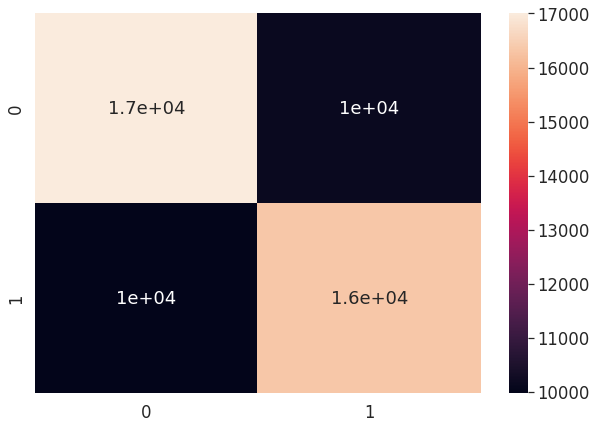

In [67]:
plt.figure(figsize=(10,7))
seaborn.heatmap(cm,annot=True)